In [3]:
from classes.Navigation import Navigation

navigation = Navigation('4_2_feature_inginiring_newbies.ipynb')

navigation.display_header()

[Главная](./1_main.ipynb) &raquo; Отбор и преобразование признаков таблицы `data_newbies`

# Отбор и преобразование признаков таблицы `data_newbies`

## Оглавление
- [Загрузка данных и добавление новых признаков](#item_load)
- [Исследование распределения новых признаков в разрезе целевой переменной `deposit`](#item_distribution)
- [Исследование корреляции новых признаков](#item_correlation)
    - [Построение матрицы корреляции и диаграммы корреляции признаков с целевой переменной `deposit`](#item_correlation_by_target)
    - [Взаимосвязь признаков `has_income` и `has_credit`](#item_relation_income_credit)
    - [Взаимосвязь признаков `is_working_age` и `has_income`](#item_relation_age_income)
- [Кодирование признаков](#item_encode)
- [Отбор лучших признаков с помощью `SelectKBest`](#item_select)
- [Нормализация признаков](#item_normalize)

## Загрузка данных и добавление новых признаков <a id="item_load"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from copy import copy

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

from classes.PrepareDataNewbies import PrepareDataNewbies

from functions.constants import TARGET_FEATURE
from functions.prepare_data import (
    get_data_with_label_encoded_columns,    
    get_samples,    
)
from functions.display_content import (
    display_relationship_features, 
    display_fields_correlation,
    display_fields_distribution_by_target,
    display_best_features,
)

In [3]:
# Загрузим данные
data_source = pd.read_csv('./data/bank_fin.csv', sep=';')

prepareData = PrepareDataNewbies(data_source)

# Добавим новые признаки
prepareData.add_new_specific_features()

data_newbies = prepareData.get_data()

## Исследование распределения новых признаков в разрезе целевой переменной `deposit` <a id="item_distribution"></a>

### Признак `has_income` (имеется ли доход у клиента)

Посмотрим на распределение признака `has_income` в разрезе целевой переменной `deposit`.

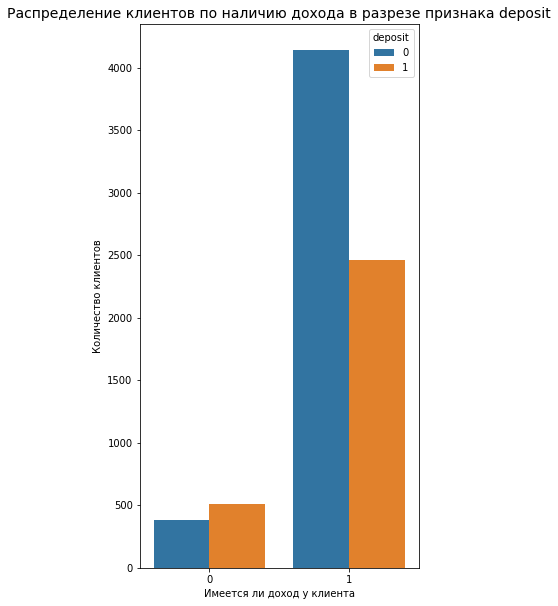

### Признак `has_credit` (имеется ли кредит у клиента)

Посмотрим на распределение признака `has_credit` в разрезе целевой переменной `deposit`.

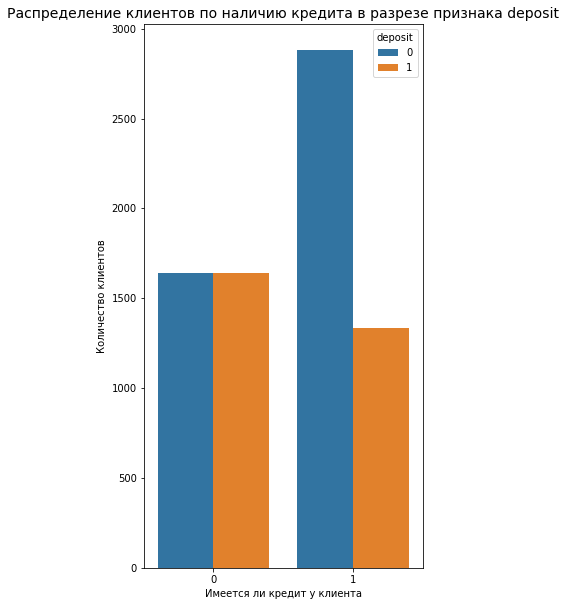

### Признак `is_debtor` (отрицательный ли баланс у клиента)

Посмотрим на распределение признака `is_debtor` в разрезе целевой переменной `deposit`.

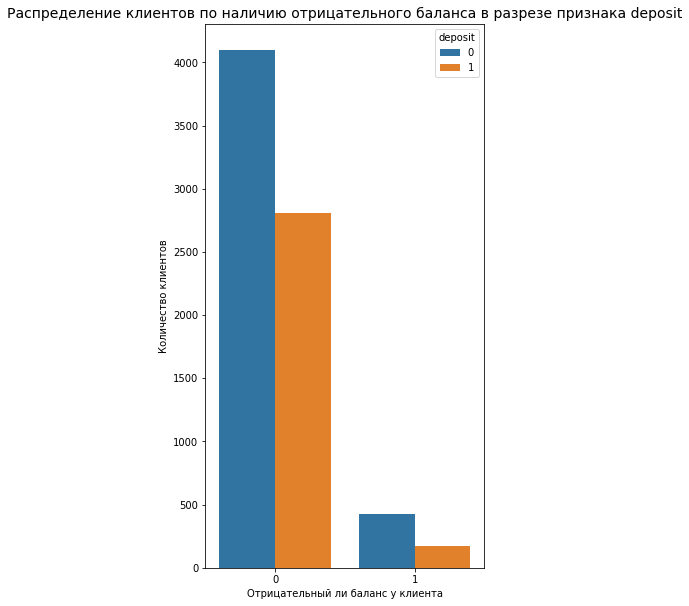

### Признак `age_scale` (шкала возраста)

Посмотрим на распределение признака `age_scale` в разрезе целевой переменной `deposit`.

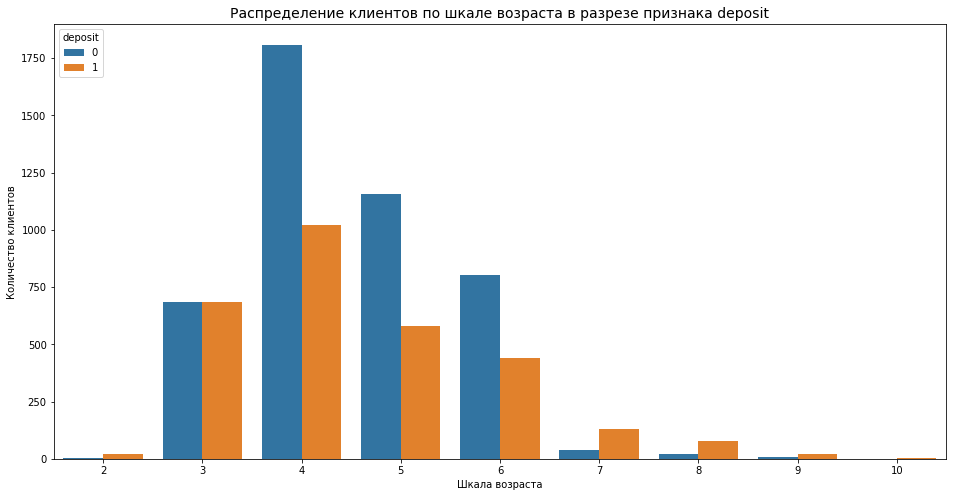

### Признак `is_working_age` (является ли возраст клиента рабочим)

Посмотрим на распределение признака `is_working_age` в разрезе целевой переменной `deposit`.

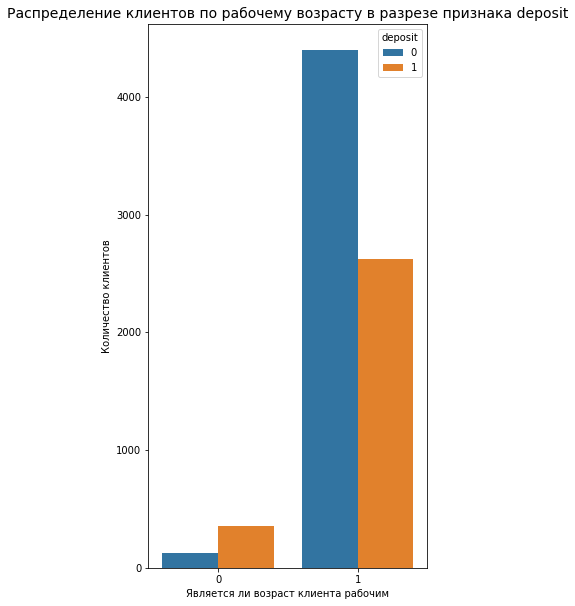

### Признак `duration_scale` (шкала длительности последнего контакта)

Посмотрим на распределение признака `duration_scale` в разрезе целевой переменной `deposit`.

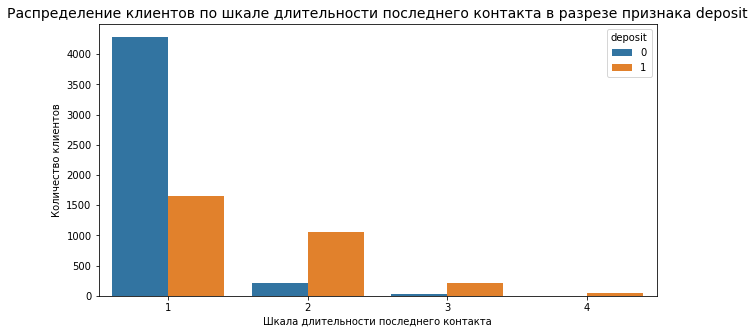

### Признак `season` (время года последнего контакта с клиентом)

Посмотрим на распределение признака `season` в разрезе целевой переменной `deposit`.

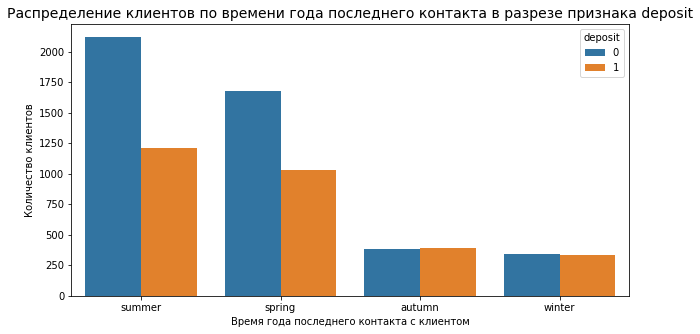

### Признак `contact_date` (дата, когда был последний контакт)

Посмотрим на распределение признака `contact_date` в разрезе целевой переменной `deposit`.

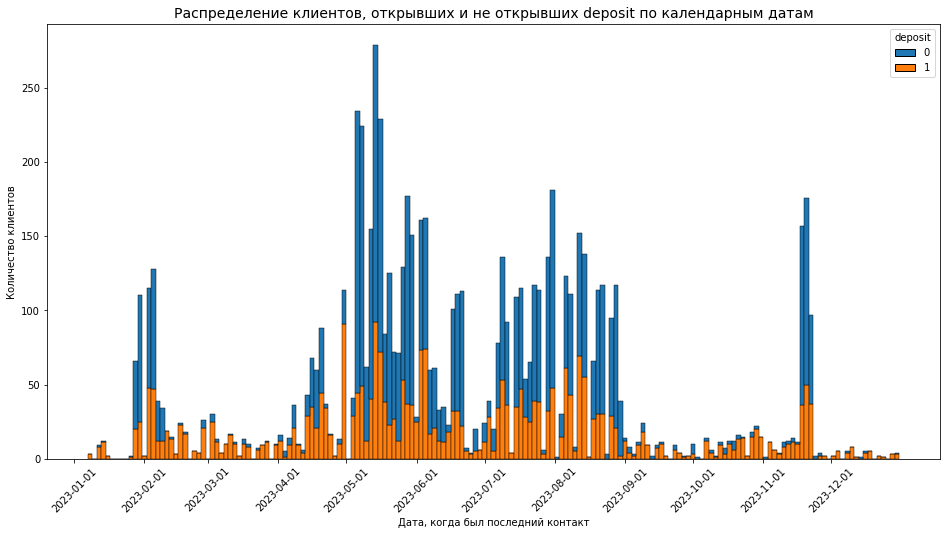

### Признак `ringing_type` (тип прозвона)

Посмотрим на распределение признака `ringing_type` в разрезе целевой переменной `deposit`.

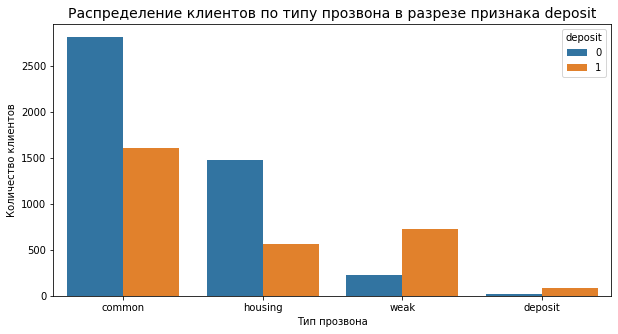

### Признак `job_loyal` (уровень лояльности к предложению открыть депозит в зависимости от сферы занятости)

Посмотрим на распределение признака `job_loyal` в разрезе целевой переменной `deposit`.

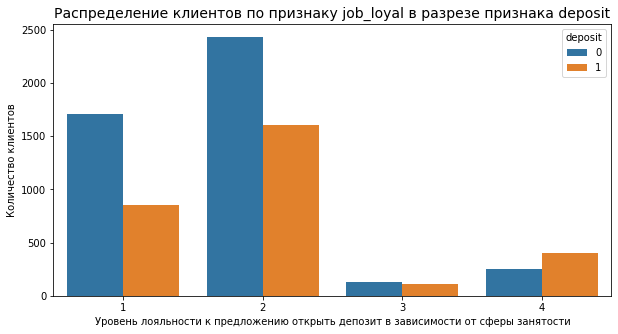

In [4]:
# Добавим к новым признакам информацию о целевой переменной
new_features = copy(prepareData.new_features)
new_features.append(TARGET_FEATURE)

display_fields_distribution_by_target(data_newbies[new_features])

### Дополнительное исследование распределения признака `contact_date`

Посмотрим на распределение признака `contact_date` с помощью `plotly`, чтобы увидеть точные даты.

In [25]:
fig1 = px.histogram(
    data_newbies, 
    x='contact_date', 
    color='deposit', 
    nbins=365,
    title='Распределение клиентов, открывших и не открывших депозит, по календарным датам',    
)
fig1.show()

Видно, что в определенные даты клиентам звонили явно чаще, в другие реже.

In [26]:
fig2 = px.histogram(
    data_newbies, 
    x='contact_date', 
    color='contact', 
    nbins=365,
    title='Распределение типа контакта с клиентами по календарным датам',
)
fig2.show()

Видно, что с 4 мая по 4 июля у большинства контактов тип `unknown`.\
Скорее всего это связано с особенностями работы банка в этот период.

In [27]:
fig3 = px.histogram(
    data_newbies, 
    x='contact_date', 
    color='housing', 
    nbins=365,
    title='Распределение клиентов, взявших и не взявших кредит на жилье, по календарным датам', 
)
fig3.show()

Можно заметить, что в определенные промежутки времени звонков (в начале мая) \
у многих клиентов оформлен кредит на жилье.\
По графику выше видно, что депозит в эти даты оформляли явно реже.\
Можно предположить, что в определенные промежутки времени были тематические прозвоны, и в зависимости от типа прозвона клиенты принимали либо одно, либо другое предложение.

Код для формирования признака с предполагаемым типом прозвона (`ringing_type`) \
вынесен в метод `get_ringing_type` класса [PrepareDataNewbies](./classes/PrepareDataNewbies.py).

## Исследование корреляции новых признаков <a id="item_correlation"></a>

### Построение матрицы корреляции и диаграммы корреляции признаков с целевой переменной `deposit` <a id="item_correlation_by_target"></a>

Построим матрицу корреляции.

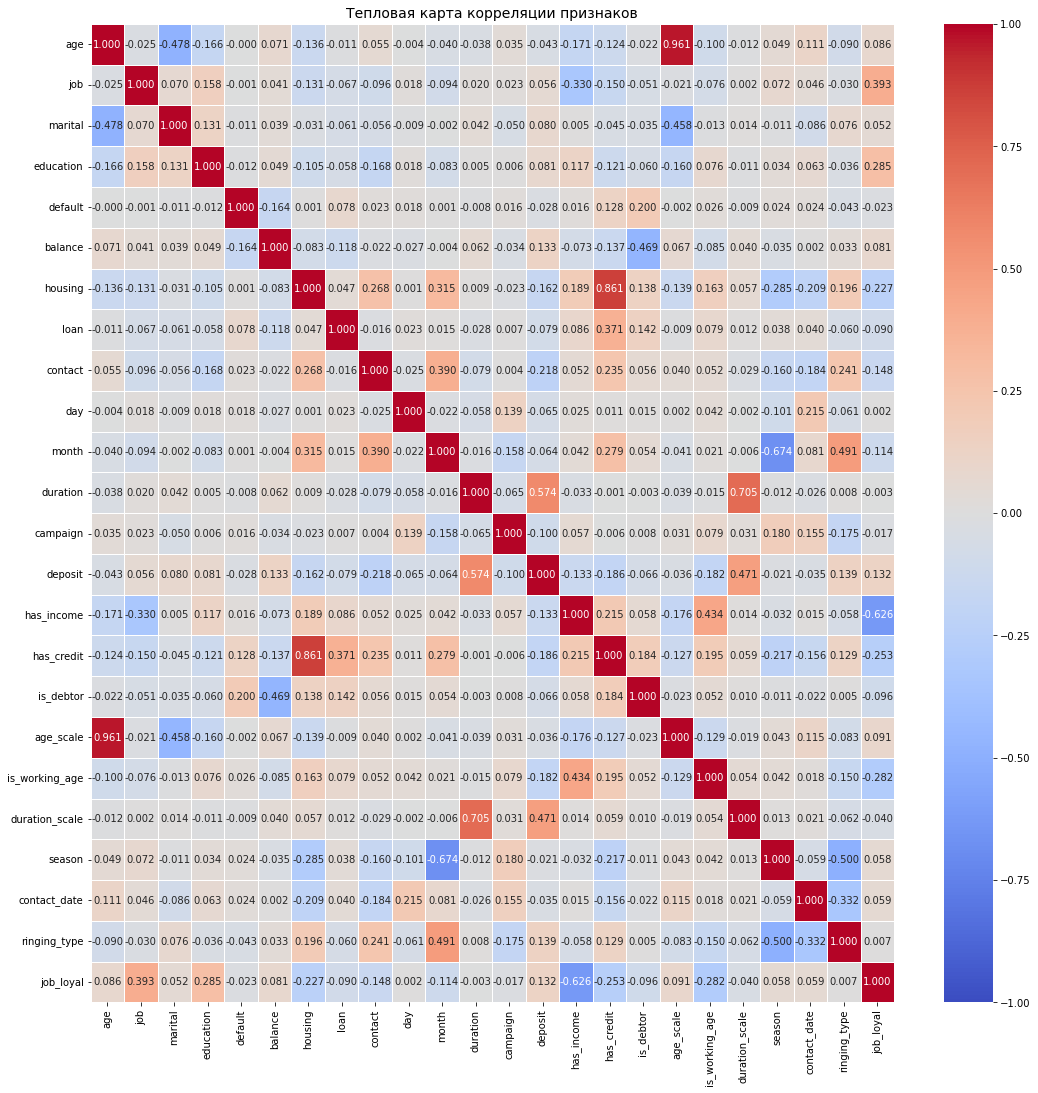

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.3`

[(['age', 'marital'], -0.48),
 (['age', 'age_scale'], 0.96),
 (['job', 'has_income'], -0.33),
 (['job', 'job_loyal'], 0.39),
 (['marital', 'age_scale'], -0.46),
 (['balance', 'is_debtor'], -0.47),
 (['housing', 'month'], 0.31),
 (['housing', 'has_credit'], 0.86),
 (['loan', 'has_credit'], 0.37),
 (['contact', 'month'], 0.39),
 (['month', 'season'], -0.67),
 (['month', 'ringing_type'], 0.49),
 (['duration', 'deposit'], 0.57),
 (['duration', 'duration_scale'], 0.71),
 (['deposit', 'duration_scale'], 0.47),
 (['has_income', 'is_working_age'], 0.43),
 (['has_income', 'job_loyal'], -0.63),
 (['season', 'ringing_type'], -0.5),
 (['contact_date', 'ringing_type'], -0.33)]

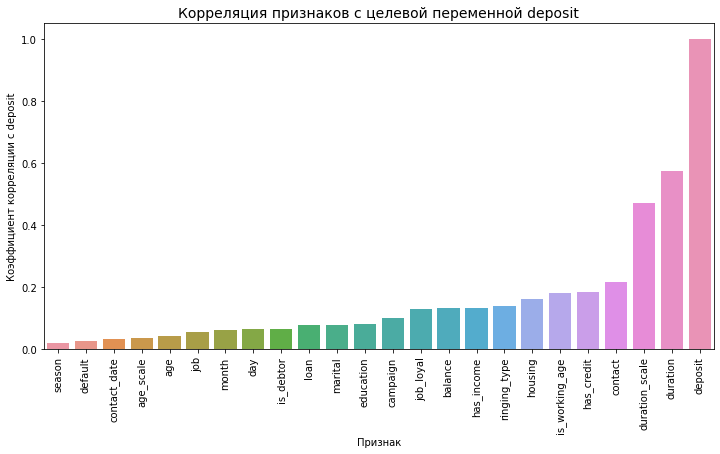

In [8]:
# Для построения матрицы корреляции к столбцам с типом `object` 
# применим порядковое кодирование с помощью `LabelEncoder`

# Сделаем копию таблицы
data_newbies_le = data_newbies.copy()

# Переведем признак contact_date в строковый
data_newbies_le['contact_date'] = data_newbies_le['contact_date'].astype(str)

# Перекодируем значения
data_newbies_le = get_data_with_label_encoded_columns(data_newbies_le)

display_fields_correlation(data_newbies_le, 0.3, 'spearman')

**Рассмотрим взаимосвязь некоторых признаков.**

<a id="item_relation_income_credit"></a>

### Взаимосвязь признаков `has_income` и `has_credit`

Вспомним описание признаков:

- `has_income` - имеется ли доход у клиента

- `has_credit` - имеется ли кредит у клиента

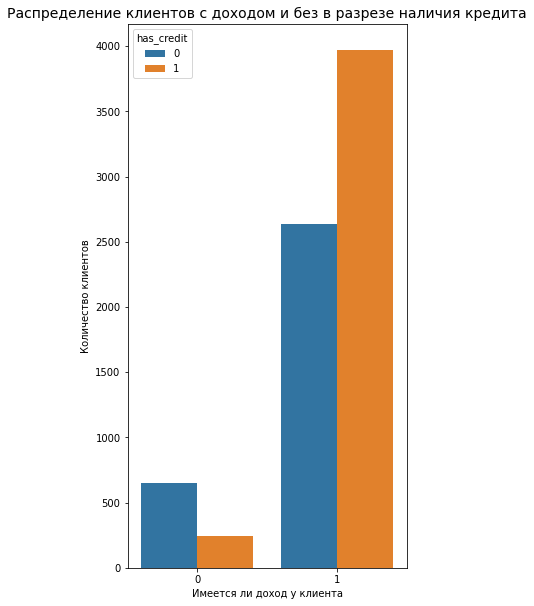

In [9]:
display_relationship_features(
    data_newbies,
    'has_income',
    feature_target='has_credit',
    title='Распределение клиентов с доходом и без в разрезе наличия кредита',
)

Чаще берут кредиты клиенты, у которых есть доход.

<a id="item_relation_age_income"></a>

### Взаимосвязь признаков `is_working_age` и `has_income`

Вспомним описание признаков:

- `is_working_age` - является ли возраст клиента рабочим

- `has_income` - имеется ли доход у клиента

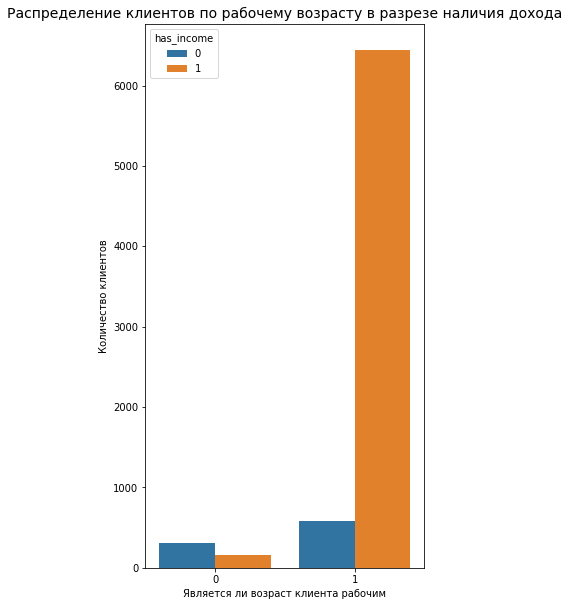

In [10]:
display_relationship_features(
    data_newbies,
    'is_working_age',
    feature_target='has_income',
    title='Распределение клиентов по рабочему возрасту в разрезе наличия дохода',
)

Клиенты в рабочем возрасте чаще имеют доход (что ожидаемо).

## Кодирование признаков <a id="item_encode"></a>

In [11]:
print(f'Удалим следующие столбцы: {prepareData.columns_to_drop}')

Удалим следующие столбцы: ['duration_scale', 'age_scale', 'housing', 'loan', 'default', 'season', 'job', 'month', 'day', 'age']


In [12]:
# Обновим данные
prepareData.update_data(data_source)

# Перекодируем столбцы
prepareData.encoded_specific_columns()

# Получим таблицу с перекодированными столбцами
data_newbies_encoded = prepareData.get_data()

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.3`

[(['balance', 'is_debtor'], -0.47),
 (['contact', 'ringing_type_common'], 0.32),
 (['contact', 'ringing_type_housing'], -0.48),
 (['contact', 'contact_date_2'], 0.39),
 (['contact', 'contact_date_3'], 0.44),
 (['duration', 'deposit'], 0.57),
 (['has_income', 'is_working_age'], 0.43),
 (['has_income', 'job_loyal'], -0.63),
 (['has_credit', 'ringing_type_housing'], 0.4),
 (['has_credit', 'contact_date_2'], -0.31),
 (['ringing_type_common', 'ringing_type_housing'], -0.73),
 (['ringing_type_common', 'ringing_type_weak'], -0.46),
 (['ringing_type_common', 'contact_date_3'], 0.33),
 (['ringing_type_housing', 'contact_date_2'], -0.4),
 (['ringing_type_housing', 'contact_date_3'], -0.42),
 (['ringing_type_weak', 'contact_date_1'], 0.38)]

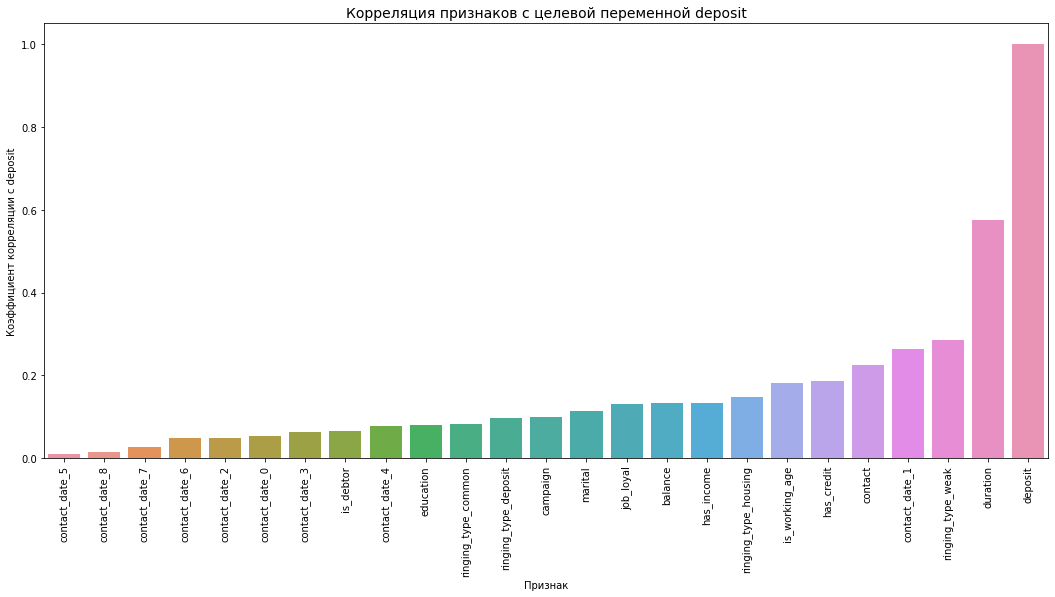

In [13]:
display_fields_correlation(
    data_newbies_encoded, 
    0.3,
    'spearman',
    False,
    (18, 8),
)

## Отбор лучших признаков с помощью `SelectKBest` <a id="item_select"></a>

In [15]:
# Получим данные тренировочной и тестовой выборок
X_train, X_test, y_train, y_test = get_samples(data_newbies_encoded)

In [16]:
# Определим ценность признаков
selector = SelectKBest(score_func=f_classif, k=prepareData.best_features_count)
selector.fit(X_train, y_train)
best_features = selector.get_feature_names_out()

**Значения оценок признаков, определенные SelectKBest**

,name,score
4,duration,2199.312490
14,ringing_type_weak,479.652935
16,contact_date_1,403.458337
3,contact,275.967478
7,has_credit,202.886676
9,is_working_age,187.536910
10,job_loyal,131.909872
13,ringing_type_housing,127.939569
6,has_income,104.039399
2,balance,87.268004


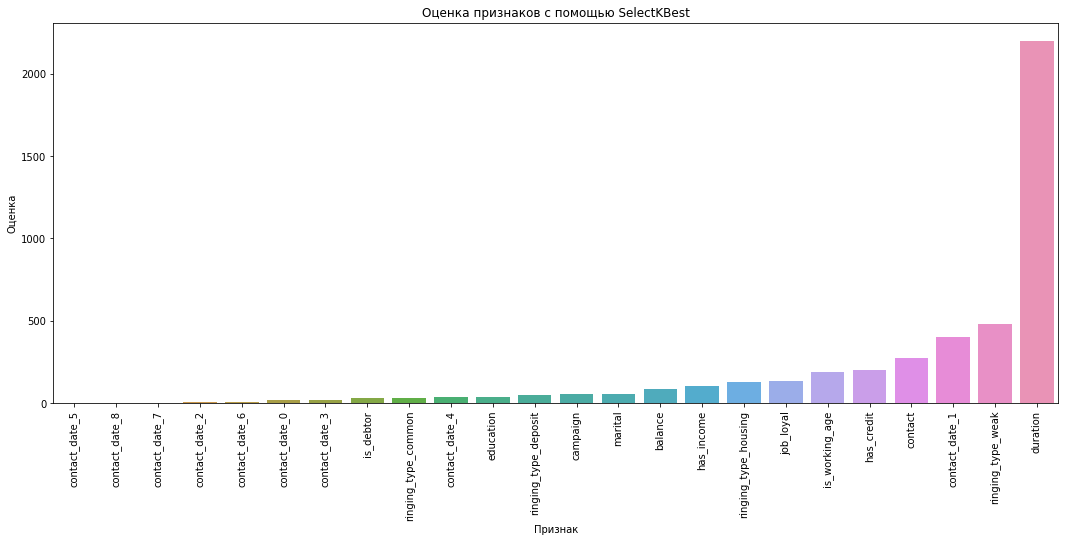

In [17]:
display_best_features(selector)

In [18]:
# Выделим лучше признаки из выборок
X_train = X_train[best_features]
X_test = X_test[best_features]

## Нормализация признаков <a id="item_normalize"></a>

In [19]:
# Посмотрим на характеристики распределения признаков на тренировочной выборке
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
marital,5624.0,0.572902,0.494701,0.0,0.0,1.0,1.00,1.0
education,5624.0,2.158428,0.650290,1.0,2.0,2.0,3.00,3.0
balance,5624.0,721.534851,935.536802,-2049.0,62.0,385.5,1088.25,3810.0
contact,5624.0,0.717283,0.450360,0.0,0.0,1.0,1.00,1.0
duration,5624.0,380.378734,368.391723,2.0,130.0,249.0,525.00,3881.0
campaign,5624.0,2.751778,3.050919,1.0,1.0,2.0,3.00,43.0
has_income,5624.0,0.880512,0.324391,0.0,1.0,1.0,1.00,1.0
has_credit,5624.0,0.563478,0.495998,0.0,0.0,1.0,1.00,1.0
is_debtor,5624.0,0.084104,0.277568,0.0,0.0,0.0,0.00,1.0
is_working_age,5624.0,0.937233,0.242564,0.0,1.0,1.0,1.00,1.0


In [20]:
# Для нормализации признаков воспользуемся MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [21]:
# Посмотрим на характеристики распределения после нормализации
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
marital,5624.0,0.572902,0.494701,0.0,0.000000,1.000000,1.000000,1.0
education,5624.0,0.579214,0.325145,0.0,0.500000,0.500000,1.000000,1.0
balance,5624.0,0.472868,0.159675,0.0,0.360300,0.415515,0.535458,1.0
contact,5624.0,0.717283,0.450360,0.0,0.000000,1.000000,1.000000,1.0
duration,5624.0,0.097545,0.094971,0.0,0.032998,0.063676,0.134829,1.0
campaign,5624.0,0.041709,0.072641,0.0,0.000000,0.023810,0.047619,1.0
has_income,5624.0,0.880512,0.324391,0.0,1.000000,1.000000,1.000000,1.0
has_credit,5624.0,0.563478,0.495998,0.0,0.000000,1.000000,1.000000,1.0
is_debtor,5624.0,0.084104,0.277568,0.0,0.000000,0.000000,0.000000,1.0
is_working_age,5624.0,0.937233,0.242564,0.0,1.000000,1.000000,1.000000,1.0


Операции по подготовке данных к обработке моделью продублированы \
в методе `get_specific_data_for_model` класса [PrepareDataNewbies](./classes/PrepareDataNewbies.py)

In [4]:
navigation.display_backlink()

**Вернуться к файлу &laquo;[Главная](./1_main.ipynb)&raquo;**